#### Vertex Coloring test instances

From here: https://turing.cs.hbg.psu.edu/txn131/graphcoloring.html

Known optimal solutions: https://sites.google.com/site/graphcoloring/vertex-coloring

In [1]:
import os
import sys

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import min_vertex_coloring as mvc
sys.path.append(os.path.abspath('../../'))
from graphilp.imports import networkx as imp_nx

In [2]:
def is_feasible(G, node_to_col):
    
    for edge in G.G_integer_labeled.edges():
        node_1 = edge[0]
        node_2 = edge[1]

        if node_to_col.get(node_1)==node_to_col.get(node_2):
            print('Infeasible Solution')
            return False
    return True

In [3]:
data_dir = os.path.abspath('./test_instances/')
#instance_fname = '1-Insertions_4.col' #5 is optimal solution
instance_fname = '1-FullIns_3.col' #4 is optimal solution
#instance_fname = '3-FullIns_3.col' #6 is optimal solution
#instance_fname = 'DSJC250.1.col' #?
instance_path = os.path.join(data_dir, instance_fname)

In [4]:
G_init = imp_nx.col_file_to_networkx(instance_path)

In [5]:
G_init.number_of_nodes()

30

In [6]:
G_init.number_of_edges()

100

In [7]:
G = imp_nx.read(G_init)

In [8]:
m = mvc.createModel(G)

Using license file /opt/gurobi/gurobi.lic


In [9]:
greedy_color_to_node, greedy_node_to_color = mvc.greedyColoring(G)

In [10]:
is_feasible(G, greedy_node_to_color)

True

In [11]:
mvc.createWarmstart(G, m, node_to_color=greedy_node_to_color)

In [12]:
m.Params.threads = 6

Changed value of parameter threads to 6
   Prev: 0  Min: 0  Max: 1024  Default: 0


In [13]:
m.optimize()

Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (linux64)
Optimize a model with 433 rows, 124 columns and 1326 nonzeros
Model fingerprint: 0x8c1c2ada
Variable types: 0 continuous, 124 integer (124 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

User MIP start produced solution with objective 4 (0.01s)
Loaded user MIP start with objective 4

Presolve removed 46 rows and 2 columns
Presolve time: 0.01s
Presolved: 387 rows, 122 columns, 1074 nonzeros
Variable types: 0 continuous, 122 integer (122 binary)

Root relaxation: objective 2.666667e+00, 163 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.66667    0   77    4.00000    2.66667  33.3%     -    0s
     0     0    3.00000    0   48    4.00000    3.00000  25.0%     -    0s
 

In [14]:
color_assignment, node_to_col = mvc.extractSolution(G, m)

In [15]:
colors_list = mvc.colors_list_from_assignment_dict(G, color_assignment)

In [16]:
available_colors = list(mcolors.BASE_COLORS.keys())
color_map = {}

for i, c in enumerate(color_assignment.keys()):
    color_map[c] = available_colors[i]

In [17]:
colors_list = [color_map.get(c_int) for c_int in colors_list]

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


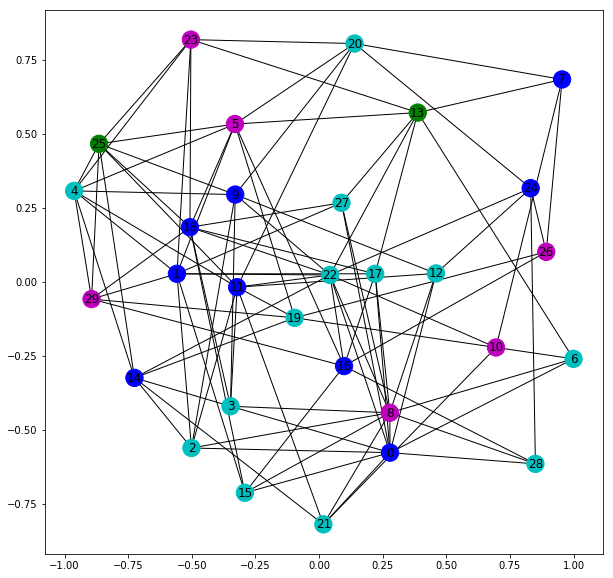

In [18]:
plt.figure(figsize=(10,10))

nx.draw_networkx(G.G_integer_labeled,
                 pos=nx.spring_layout(G.G_integer_labeled),
                 node_color=colors_list,
                figsize=(10,10))